<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Abschnitt_4_Neural_Network_classification_with_TensorFlow/%2002_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Introduction to neural network classification with TensorFlow

# Types of Classification
* Binary classification
* Multiclass classification
* Multilabel classification

# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000

#Create circles
x,y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#Visualize the data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0" :x[:, 0], "X1":x[:, 1], "labels":y })

In [6]:
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
circles["labels"].value_counts()

1    500
0    500
Name: labels, dtype: int64

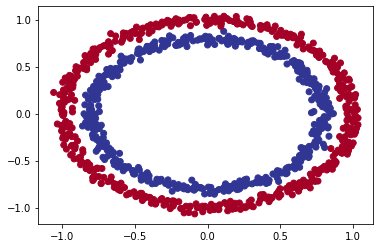

In [8]:
#Visualize data with plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu) #cm = Red, Yellow, Blue

#Input and output shapes

In [9]:
#Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [10]:
#How many samples we´re working 
len(x), len(y)

(1000, 1000)

In [11]:
#View the first ecamples of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#Steps in modelling

In [12]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [13]:
#Set the random seed
tf.random.set_seed(42)

#Create a model
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_1.compile(loss="BinaryCrossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model 
model_1.fit(x,y, epochs=5, verbose=0)

In [14]:
#Evaluate the model
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5000


[0.7012460231781006, 0.5]

In [15]:
#Let´s try and improve our model by training for longer...
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4960


[0.6931473016738892, 0.4959999918937683]

Since we´re working on a binary classification problem and our model is getting around 50% accuracy... it´s performing as if it´s guessing

So let´s step things up and add an extra layer

In [16]:
#Set random seed
tf.random.set_seed(42)

#create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(loss="BinaryCrossentropy", metrics=["accuracy"], optimizer="SGD")

#fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [17]:
#evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

#Improving our model

1. Create a model - add more layers, increase number of hidden units
2. Compile th model - different optimization function
3. Fit the model - more epochs

In [18]:
#set random seed
tf.random.set_seed(42)

#create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10), 
                               tf.keras.layers.Dense(1)
                               
])

#compile the model

model_3.compile(loss="BinaryCrossentropy", metrics="accuracy", optimizer="Adam")

#fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [20]:
#evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

#Visualize the predictions
To visualize oure model´s predictions, let´s create a function plot_decision_boundary().
This function will
* Take in a trained model, features (x) and labels (y)
* Create a meshgrid of th different x values
 * make predictions across the meshgrid
 * Plot te predictions as well as a line between zones (where each unique class falls)

In [21]:
print((model_3.predict(x))[:10])

[[0.4879787 ]
 [0.55872184]
 [0.5627685 ]
 [0.5704468 ]
 [0.44131786]
 [0.5738097 ]
 [0.55764705]
 [0.48250747]
 [0.47739553]
 [0.5750268 ]]


In [22]:
import numpy as np

In [23]:
def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x.
  """
  #Define the axis boubdaries of the plot and create meshgrid - 0.1 for mor margin
  x_min = x[:, 0].min() - 0.1
  x_max = x[:, 0].max() + 0.1
  y_min = x[:, 1].min() - 0.1
  y_max = x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  #Create x value 
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  #Check if multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    #We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=2).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  #Plot the decision boundary
  plt.contour(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


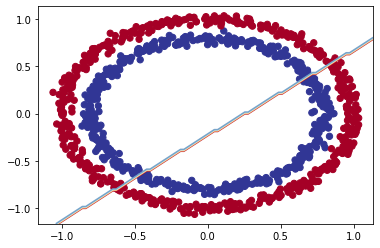

In [24]:
#Check out the prediction our model is making
plot_decision_boundary(model_3, x, y)

In [25]:
#Let´s see if our model can be used for a regression problem..

tf.random.set_seed(42)

#create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

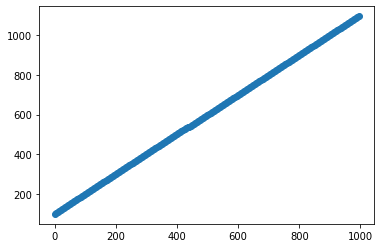

In [26]:
plt.scatter(x_regression, y_regression)

In [27]:
#Split our regression data into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [28]:
#model_3.fit(x_reg_train, y_reg_train, epochs=100, verbose=0)

We compiled our model for a binary classification problem.
But we´re no workung on a regression problem - let´s change the model for our data

In [29]:
#set random seed
tf.random.set_seed(42)

#create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10), 
                               tf.keras.layers.Dense(1)
                               
])

#compile the model

model_3.compile(loss="mae", metrics=["mae"], optimizer="Adam")

#fit the model
model_3.fit(x_reg_train, y_reg_train, epochs=150, verbose=0)

In [30]:
model_3.evaluate(x_reg_test, y_reg_test)

2/2 [==============================] - 0s 5ms/step - loss: 54.6104 - mae: 54.6104


[54.61040496826172, 54.610408782958984]

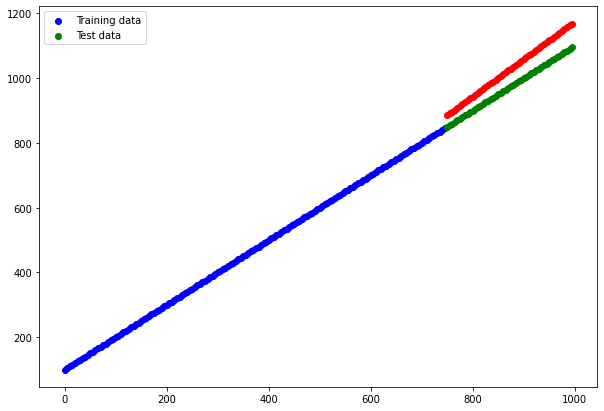

In [31]:
y_reg_preds = model_3.predict(x_reg_test)

#plot the models predictions
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_preds, c="r")
plt.legend()

# Non-linearity

In [32]:
#Set random seed
tf.random.set_seed(42)

#Create th model 
model_4 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#Compile the model
model_4.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model
model_4.fit(x, y, epochs=100, verbose=0)

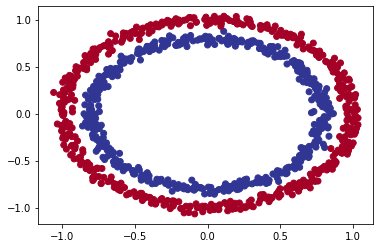

In [33]:
#check out out data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


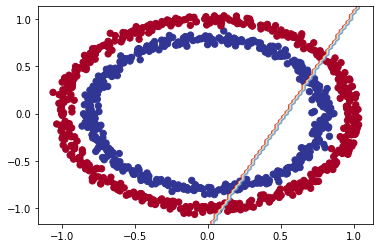

In [34]:
#Check the decision boundary for our latest model
plot_decision_boundary(model_4, x, y)

Let´s try build our first neural network with a non-linear activation function

In [35]:
#set random seed
tf.random.set_seed(42)

#Create a model with a non-linear activation function
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation="relu")
])

#Compile the model
model_5.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model
history = model_5.fit(x, y, epochs=100, verbose=0)

In [36]:
#set random seed
tf.random.set_seed(42)

#Create the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="relu"),
])

#Compile the model
model_6.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model
history = model_6.fit(x, y, epochs=250, verbose=0)

In [37]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: No contour levels were found within the data range.


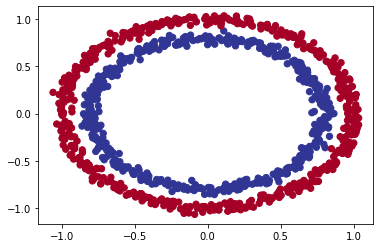

In [38]:
#How do our model predictions look like
plot_decision_boundary(model_6, x, y)

In [39]:
#set random seed
tf.random.set_seed(42)

#Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid"),
])

#Compile the model
model_7.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model
history = model_7.fit(x, y, epochs=250, verbose=0)

In [40]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593364894390106, 0.9919999837875366]

doing binary classification


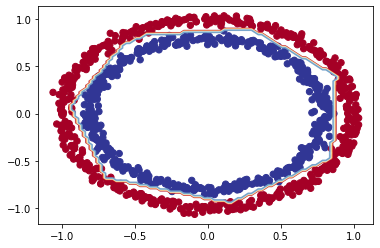

In [41]:
plot_decision_boundary(model_7, x, y)

In [42]:
#Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

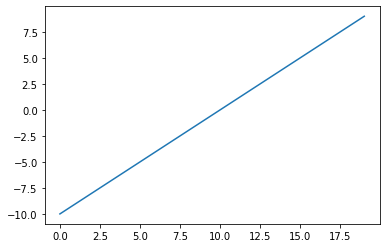

In [43]:
#Visualize our toy tensor
plt.plot(A)

In [44]:
#Let´s start by replicating sigmoid - sigmoid (x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

#Use the sigmoid function on our toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

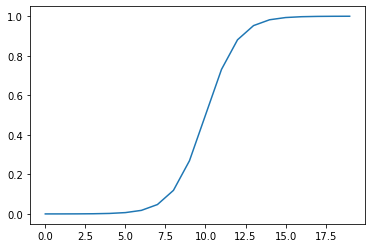

In [45]:
#Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [46]:
#Let´s recreate the relu function

def relu(x):
  return tf.maximum(0, x)

#Pass our toy tensor to our costum relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

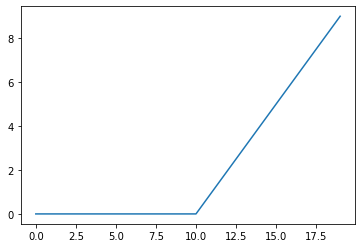

In [47]:
#Plot our toy tensor transformed by relu
plt.plot(relu(A))

In [48]:
#Let´s try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

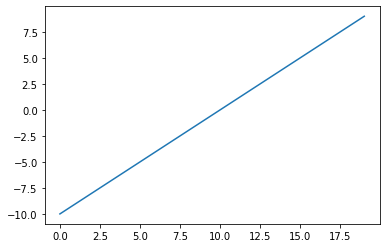

In [49]:
#Plot our toy tensor transformed by linear activation
plt.plot(tf.keras.activations.linear(A))

In [50]:
#Does A even change? 
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

### Evaluating and improving our classification

So far we´ve been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let´s create a training and test set.

In [51]:
#Check how many examples in dataset 
len(x)

1000

In [52]:
#Split into train and test sets
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

In [53]:
#print shapes of train and test set 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [54]:
#Recreate a model to fir on the training data and evaluate on the test data

#Set random seed
tf.random.set_seed(42)

#Create the model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, "sigmoid")
])

#Compile the model
model_8.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=["accuracy"])

#Fit the model
history = model_8.fit(x_train, y_train, epochs=25, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [55]:
#Evaluate the model on the test dataset 
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

doing binary classification
doing binary classification


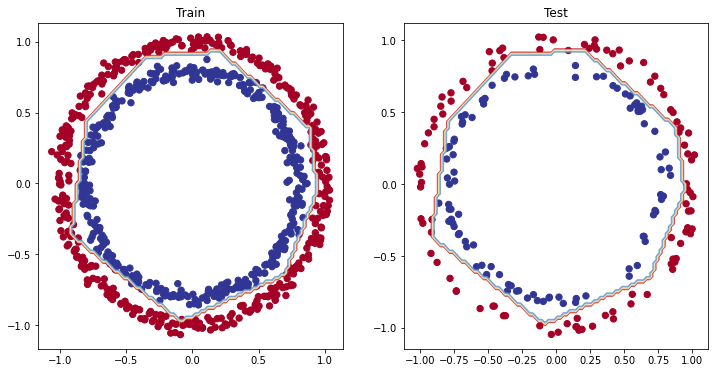

In [56]:
#Plot the decision boundaries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, x_test, y_test)

## Plot loss (or training) curve

In [57]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571403,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

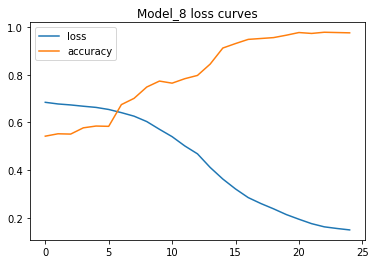

In [58]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To fing the ideal learning rate (the learning rate where the loss decreases the most during training) we´re goin to use the following steps:
* a learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model while it´s training. 
* Another modek (we could use the sam one as above, but we´re practicing
* a modified loss curves plot.

In [59]:
# Set random seed
tf.random.set_seed(42)
                   
                   #Create the model
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_9.compile(loss="binary_crossentropy", 
                optimizer="Adam", 
                metrics=["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the model
history = model_9.fit(x_train, y_train, epochs=100, verbose=0, callbacks=[lr_scheduler])

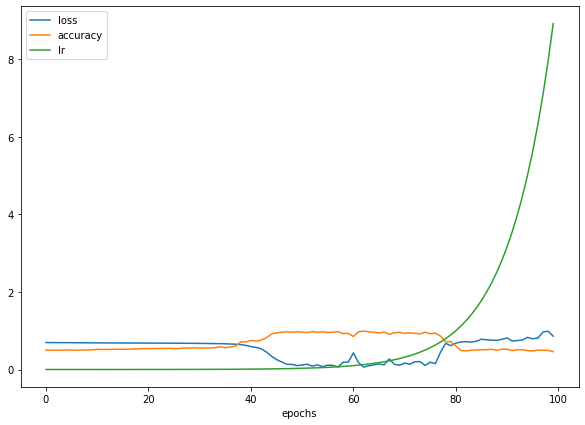

In [60]:
#Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

In [61]:
#Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs. Loss')

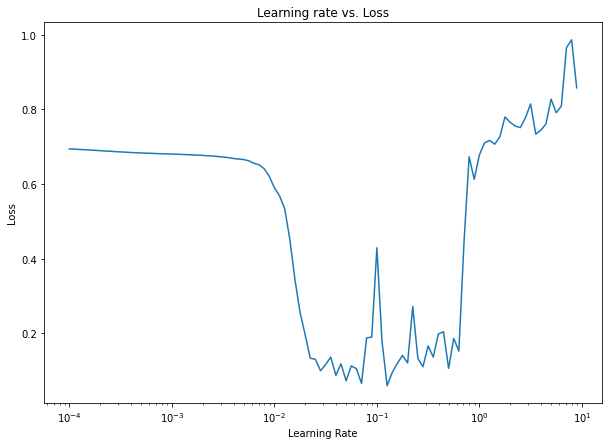

In [62]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [63]:
#Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [64]:
#Let´s try using a higher ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)
                   
                   #Create the model
model_10 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_10.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), 
                metrics=["accuracy"])

#Fit the model
history = model_10.fit(x_train, y_train, epochs=20, verbose=0)

In [65]:
model_10.evaluate(x_test ,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401832193136215, 0.9900000095367432]

Text(0.5, 1.0, 'Model_10 training curve')

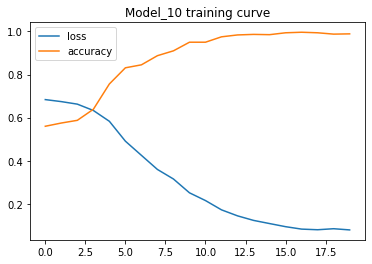

In [66]:
pd.DataFrame(history.history).plot()
plt.title("Model_10 training curve")

doing binary classification
doing binary classification


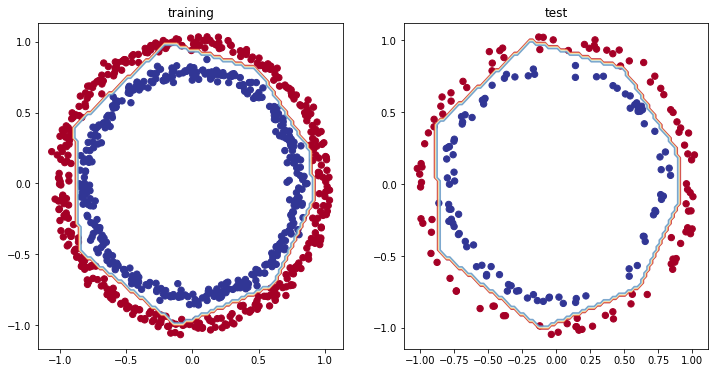

In [67]:
#Plot the decision boundary for the training and test set
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("training")
plot_decision_boundary(model_10, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_10, x_test, y_test)

## More classifictaion evaluation methods

Alongside visualizing our model results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision 
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit learn)

In [68]:
# Check the accuracy of our model 
loss, accuracy = model_10.evaluate(x_test, y_test)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Loss:  0.057401832193136215
Accuracy:  0.9900000095367432


# Confusion matrix

In [69]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds = model_10.predict(x_test)

#Create confusion matrix
#confusion_matrix(y_test, y_preds)

Predictions array come out in predictions probability form - standard output from sigmoid / softmax activation functions...

In [70]:
#Convert predictions probabilities to binary format and view the first 10

tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [71]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(x_test)

confusion_matrix(y_test, (tf.round(y_preds)))

array([[99,  2],
       [ 0, 99]])

# Prettifiy our confusion matrix...

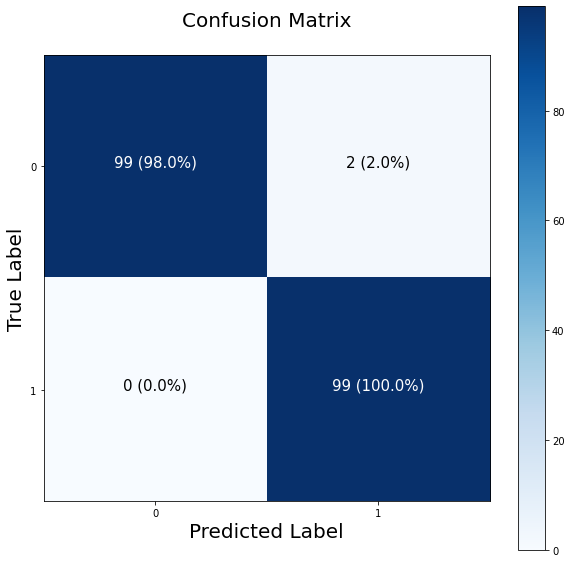

In [72]:
import itertools

figsize = (10,10)

#Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize confusion matrix
n_classes = cm.shape[0]

#Let´s prettifiy it
fig, ax = plt.subplots(figsize=figsize)
#Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#Label the axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set treshold for different colors
treshold = (cm.max() + cm.min()) / 2

#Plot th text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center", 
           color="white" if cm[i, j] > treshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it´s known as multi-class classification.

* This means if you have 3 different classes, it´s multi-class classification
* It also means if you habe 100 different classes, it´s multi-class classification

Tp practice multi-class classification, we´re goind to build a neural network to classify images of different items of clothing.

In [73]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#Import the data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [74]:
#Show the first training example
print(f"Training sample: \n {train_data[0]} \n")
print(f"Training label: \n {train_labels[0]} \n")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [75]:
#Ceck the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

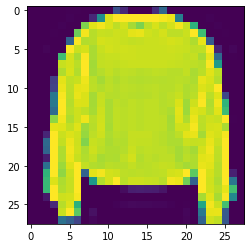

In [76]:
#Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [77]:
#Check out samples label
train_labels[7]

2

In [79]:
#Create a small list so we can index onto out training labels so they´re human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

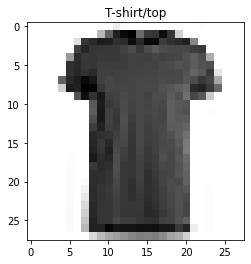

In [83]:
#Plot an example image and it`s labels
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

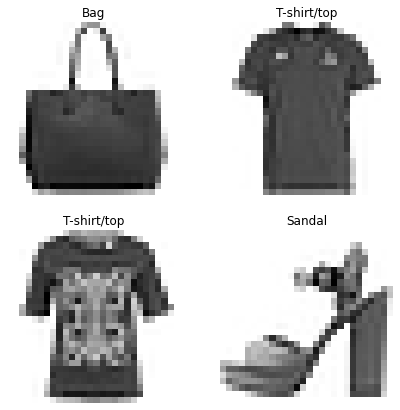

In [90]:
#Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we´re going to have to tweak a few things:
* Input shape = 28x28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activatiin = Softmax

In [101]:
#Set random seed
tf.random.set_seed(42)

#Build the model
model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(10, activation="softmax")
])

#Compile the model
model_11.compile(loss="CategoricalCrossentropy", optimizer="Adam", metrics=["accuracy"])

#Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)), verbose=0)

In [96]:
#Check the model summary
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [97]:
#Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the number in the tensors between 0 & 1.

In [98]:
#We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [99]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [104]:
#Set random seed
tf.random.set_seed(42)

#Build the model
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(10, activation="softmax")
])

#Compile the model
model_12.compile(loss="CategoricalCrossentropy", optimizer="Adam", metrics=["accuracy"])

#Fit the model
norm_history = model_12.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)), verbose=0)

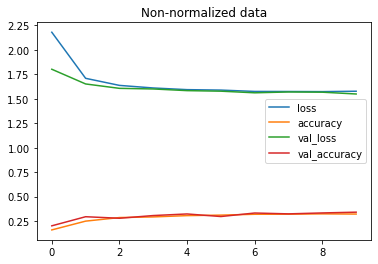

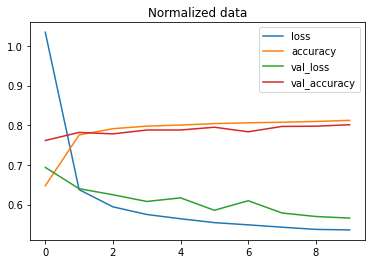

In [106]:
import pandas as pd
#plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")